In [ ]:
# prompt: name the title as Tanushree Poojary/ NetID: tp25




In [ ]:
!pip install requests beautifulsoup4 pandas


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime


In [ ]:
url = "https://dsrs.illinois.edu/"
resp = requests.get(url)
resp.raise_for_status()
soup = BeautifulSoup(resp.text, "html.parser")
print("My Page title is", soup.title.string)


My Page title is DSRS | DSRS


In [ ]:
# prompt: to see core section names like Data Hub, Infrastructure, Services, Engagement, Growth, or similar

h3_headings = [h3.get_text(strip=True) for h3 in soup.find_all("h3")]
print(h3_headings)


['Research Support', 'Student Internships', 'Data Science Consulting']


In [ ]:
sections = []
for h3 in soup.find_all("h3"):
    title = h3.get_text(strip=True)
    p = h3.find_next_sibling("p")
    desc = p.get_text(strip=True) if p else ""
    a = h3.find_next_sibling("a")
    link_text = a.get_text(strip=True) if a else ""
    link_url = a["href"] if a and a.has_attr("href") else ""
    sections.append({
        "Section": title,
        "Description": desc,
        "Link Text": link_text,
        "URL": link_url
    })
df = pd.DataFrame(sections)
df.head()


,Section,Description,Link Text,URL
0,Research Support,DSRS assists Gies College of Business faculty ...,,
1,Student Internships,The DSRS is regularly looking for data science...,,
2,Data Science Consulting,Assessment and recommendations of statistical ...,,


In [ ]:
# prompt: save df to csv

df.to_csv("dsrs_sections.csv", index=False)
print("Saved dsrs_sections.csv")


Saved dsrs_sections.csv


In [ ]:
from urllib.parse import urljoin

base_url = "https://dsrs.illinois.edu"
sections = []
for h3 in soup.find_all("h3"):
    title = h3.get_text(strip=True)
    p = h3.find_next_sibling("p")
    desc = p.get_text(strip=True) if p else ""
    a = p.find("a") if p else None
    link_text = a.get_text(strip=True) if a else ""
    link_url = urljoin(base_url, a["href"]) if a and a.has_attr("href") else ""
    sections.append({
        "Category": title,
        "Description": desc,
        "LinkText": link_text,
        "URL": link_url
    })

df_sections = pd.DataFrame(sections)
df_sections


,Category,Description,LinkText,URL
0,Research Support,DSRS assists Gies College of Business faculty ...,Read more,https://inside.giesbusiness.illinois.edu/acade...
1,Student Internships,The DSRS is regularly looking for data science...,Read more,https://dsrs.illinois.edu/about/students
2,Data Science Consulting,Assessment and recommendations of statistical ...,,


In [ ]:
import requests
from bs4 import BeautifulSoup

sections_to_inspect = {
    "Research Support": "https://inside.giesbusiness.illinois.edu/academic-units/di/dsrs",
    "Student Internships": "https://dsrs.illinois.edu/students"
}

for name, url in sections_to_inspect.items():
    resp = requests.get(url)
    resp.raise_for_status()
    soup_x = BeautifulSoup(resp.text, "html.parser")

    # To grab the main content wrapper for entries
    container = (
        soup_x.find("div", class_="view-content")
        or soup_x.find("ul", class_="item-list")
        or soup_x
    )
    print(f"=== {name} Container Preview ===")
    print(container.prettify()[:500])
    print("\n")


=== Research Support Container Preview ===
<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <!-- meta tags for mobile devices -->
  <meta content="Data Science Research Service" property="og:title">
   <meta content="width=device-width, initial-scale=1" name="viewport"/>
   <meta content="yes" name="mobile-web-app-capable"/>
   <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
   <meta content


=== Student Internships Container Preview ===
<!DOCTYPE html>
<html class="docs-wrapper plugin-docs plugin-id-students docs-version-current docs-doc-page docs-doc-id-index" data-has-hydrated="false" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="Docusaurus v3.7.0" name="generator"/>
  <title data-rh="true">
   Overview | DSRS
  </title>
  <meta content="width=device-width,initial-scale=1" data-rh="true" name="viewport"/>
  <m

In [ ]:
import pandas as pd

internship_areas = [
    {
        "Area": "Data Science and Machine Learning Infrastructure",
        "Description": (
            "For these interns, tasks can be anything from building out "
            "cloud infrastructure, working with Microsoft Azure, setting up ML environments, "
            "data processing, writing python code, feature engineering, and analyzing data "
            "through various data science methods. It also includes working with DSRS infrastructure, "
            "including S3, Docker, Kubernetes, etc."
        ),
        "SourceURL": "https://dsrs.illinois.edu/students"
    },
    {
        "Area": "Text and Data Mining",
        "Description": (
            "For these interns, tasks can be anything from collecting text data from various sources, "
            "cleaning/transforming data, and analyzing data through various text mining methods. "
            "Also might include NLP tasks, web scraping, API development and parallel computing, among others."
        ),
        "SourceURL": "https://dsrs.illinois.edu/students"
    },
    {
        "Area": "Data Science Web Visualization and Data Analytic",
        "Description": (
            "For these interns, there are projects that need to have some interactive visualization "
            "and to explore data using dashboards. Projects look to build interactive visualizations, "
            "web apps, websites using current technologies."
        ),
        "SourceURL": "https://dsrs.illinois.edu/students"
    },
    {
        "Area": "Data Science Business and Communications",
        "Description": (
            "For these interns, tasks can be anything from writing stories about our projects to assisting "
            "with data science projects through human coding of data and visualizing data results. "
            "These interns handle marketing of the DSRS, updating our website, blog posting and some management as well."
        ),
        "SourceURL": "https://dsrs.illinois.edu/students"
    }
]

df_internships = pd.DataFrame(internship_areas)



In [ ]:
df_internships.to_csv("dsrs_internships.csv", index=False)
print("Saved dsrs_internships.csv")


Saved dsrs_internships.csv


In [ ]:
# prompt: now for research support

import re
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 1. Fetching and parsing the Research Support page
research_url = "https://inside.giesbusiness.illinois.edu/academic-units/di/dsrs"
resp = requests.get(research_url)
resp.raise_for_status()
soup_rs = BeautifulSoup(resp.text, "html.parser")

# 2. Locating the "At a high level" heading and its list
help_tag = soup_rs.find("h6", string=re.compile(r"At a high level", re.IGNORECASE))
ul = help_tag.find_next("ul") if help_tag else None

# 3. Extracting services and sub-services
services = []
if ul:
    for li in ul.find_all("li", recursive=False):
        main_text = li.find(text=True, recursive=False).strip()
        nested = li.find("ul")
        subs = [sub.get_text(strip=True) for sub in nested.find_all("li")] if nested else []
        services.append({
            "Category": "Research Support",
            "Service": main_text,
            "SubServices": "; ".join(subs)
        })

# 4. Building DataFrame and save
df_services = pd.DataFrame(services)
df_services.to_csv("dsrs_services.csv", index=False)
print("Saved dsrs_services.csv")

# 5. Display the DataFrame
df_services



Saved dsrs_services.csv


<ipython-input-21-c0cd4e4a4ec4>:24: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = li.find(text=True, recursive=False).strip()


,Category,Service,SubServices
0,Research Support,Assessment and recommendations of what statist...,Inferential Statistics; Social Media Analytics...
1,Research Support,Execution of statistical and data science meth...,This may include sub-contracting the analyses ...
2,Research Support,Assessment and recommendations for computation...,On-Campus Computation; Cloud Computing; Custom...
3,Research Support,Assistance in acquiring computational resource...,This may include sub-contracting the analyses ...
4,Research Support,Assessment and recommendations for data needed...,Social Media Data; Web Data; Financial Data
5,Research Support,Assistance in locating and acquiring data nee...,


In [ ]:
import pandas as pd

consulting_services = [
    {
        "Category": "Data Science Consulting",
        "Service": "Assessment and recommendations of what statistical and data science methods are appropriate for your research question(s)",
        "SubServices": "Inferential Statistics; Social Media Analytics; Text Mining; Natural Language Processing; Machine Learning; Deep Learning"
    },
    {
        "Category": "Data Science Consulting",
        "Service": "Execution of statistical and data science methods for your research study",
        "SubServices": "This may include sub-contracting the analyses to other units on campus to connect you with specialized expertise"
    },
    {
        "Category": "Data Science Consulting",
        "Service": "Assessment and recommendations for computational infrastructure needed to execute specified data science methods for your research",
        "SubServices": "On-Campus Computation; Cloud Computing; Custom-Built On-Premise Computation"
    },
    {
        "Category": "Data Science Consulting",
        "Service": "Assistance in acquiring computational resources for executing data science methods for your research",
        "SubServices": "This may include connecting with external campus units such as NCSA for cost-effective resources"
    },
    {
        "Category": "Data Science Consulting",
        "Service": "Assessment and recommendations for data needed to answer your research question(s)",
        "SubServices": "Social Media Data; Web Data; Financial Data"
    },
    {
        "Category": "Data Science Consulting",
        "Service": "Assistance in locating and acquiring data needed to answer your research question(s)",
        "SubServices": "(Funds to acquire data are the responsibility of you or your department)"
    }
]

df_consulting = pd.DataFrame(consulting_services)

# Save to CSV
df_consulting.to_csv("dsrs_consulting.csv", index=False)
print("Saved dsrs_consulting.csv")

# Display
df_consulting


Saved dsrs_consulting.csv


,Category,Service,SubServices
0,Data Science Consulting,Assessment and recommendations of what statist...,Inferential Statistics; Social Media Analytics...
1,Data Science Consulting,Execution of statistical and data science meth...,This may include sub-contracting the analyses ...
2,Data Science Consulting,Assessment and recommendations for computation...,On-Campus Computation; Cloud Computing; Custom...
3,Data Science Consulting,Assistance in acquiring computational resource...,This may include connecting with external camp...
4,Data Science Consulting,Assessment and recommendations for data needed...,Social Media Data; Web Data; Financial Data
5,Data Science Consulting,Assistance in locating and acquiring data need...,(Funds to acquire data are the responsibility ...


In [ ]:
!ls -1


dsrs_consulting.csv
dsrs_internships.csv
dsrs_kb.db
dsrs_research_support_details.csv
dsrs_sections.csv
dsrs_services.csv
sample_data


In [ ]:
import pandas as pd
import sqlite3

# Connecting to SQLite database
conn = sqlite3.connect('dsrs_kb.db')
cursor = conn.cursor()

# Building Category name
cursor.execute("SELECT CategoryID, Name FROM Category;")
mapping = {name: cid for cid, name in cursor.fetchall()}

# 1. Loading Internship items
df_int = pd.read_csv('dsrs_internships.csv')
df_int = df_int.rename(columns={
    'Area': 'Title',
    'Description': 'Description',
    'SourceURL': 'URL'
})
df_int['LinkText'] = None

# All these items map to the “Student Internships” category
df_int['CategoryID'] = mapping['Student Internships']
items_int = df_int[['CategoryID', 'Title', 'Description', 'LinkText', 'URL']]

# 2. Loading Research Support services
df_srv = pd.read_csv('dsrs_services.csv')
df_srv = df_srv.rename(columns={'Service': 'Title', 'SubServices': 'Description'})
df_srv['LinkText'] = None
df_srv['URL'] = None
df_srv['CategoryID'] = mapping['Research Support']
items_srv = df_srv[['CategoryID', 'Title', 'Description', 'LinkText', 'URL']]

# 3. Loading Consulting services
df_cons = pd.read_csv('dsrs_consulting.csv')
df_cons = df_cons.rename(columns={'Service': 'Title', 'SubServices': 'Description'})
df_cons['LinkText'] = None
df_cons['URL'] = None
df_cons['CategoryID'] = mapping['Data Science Consulting']
items_cons = df_cons[['CategoryID', 'Title', 'Description', 'LinkText', 'URL']]

# 4. Concatenating and inserting into the Item table
df_items = pd.concat([items_int, items_srv, items_cons], ignore_index=True)
df_items.to_sql('Item', conn, if_exists='append', index=False)

# 5. Reporting results
print(f"Loaded total items: {len(df_items)}")
print(pd.read_sql_query("SELECT * FROM Item LIMIT 10;", conn))

conn.close()


Loaded total items: 16
   ItemID  CategoryID                                              Title  \
0       1           2   Data Science and Machine Learning Infrastructure   
1       2           2                               Text and Data Mining   
2       3           2   Data Science Web Visualization and Data Analytic   
3       4           2           Data Science Business and Communications   
4       5           1  Assessment and recommendations of what statist...   
5       6           1  Execution of statistical and data science meth...   
6       7           1  Assessment and recommendations for computation...   
7       8           1  Assistance in acquiring computational resource...   
8       9           1  Assessment and recommendations for data needed...   
9      10           1  Assistance in locating and acquiring data  nee...   

                                         Description LinkText  \
0  For these interns, tasks can be anything from ...     None   
1  For the

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

                  Category  Count
0         Research Support      6
1  Data Science Consulting      6
2      Student Internships      4


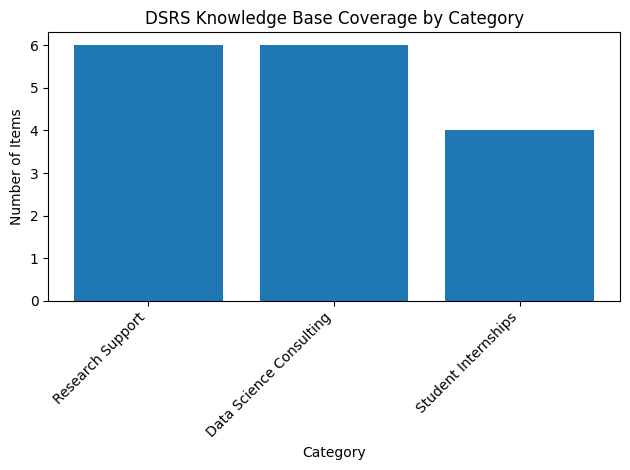

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connecting to the SQLite database
conn = sqlite3.connect('dsrs_kb.db')

# Querying item counts by category
df_counts = pd.read_sql_query("""
    SELECT c.Name AS Category, COUNT(i.ItemID) AS Count
    FROM Item i
    JOIN Category c ON i.CategoryID = c.CategoryID
    GROUP BY c.Name
    ORDER BY Count DESC
""", conn)
conn.close()

# Ensuring Count is integer type
df_counts['Count'] = df_counts['Count'].astype(int)
print(df_counts)

# Plot bar chart
plt.figure()
plt.bar(df_counts['Category'], df_counts['Count'])
plt.xlabel('Category')
plt.ylabel('Number of Items')
plt.title('DSRS Knowledge Base Coverage by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Updated load_items function to ensure 'URL' column exists

from datetime import datetime
import pandas as pd
import sqlite3

def load_items(conn, csv_path, category_name, col_map):
    """
    Loads items from a CSV into the Item table.
    col_map maps CSV column names to DB column names, e.g.
      {'Area':'Title', 'Service':'Title', 'SubServices':'Description', 'SourceURL':'URL'}
    """
    df = pd.read_csv(csv_path)
    df = df.rename(columns=col_map)

    # Ensuring required DB columns are present
    df["LinkText"] = None
    df["URL"] = df["URL"] if "URL" in df.columns else None
    df["CategoryID"] = conn.execute(
        "SELECT CategoryID FROM Category WHERE Name = ?", (category_name,)
    ).fetchone()[0]
    df["LastUpdated"] = datetime.utcnow()

    # Pruning to exactly the DB schema
    df = df[["CategoryID", "Title", "Description", "LinkText", "URL", "LastUpdated"]]
    df.to_sql("Item", conn, if_exists="append", index=False)




In [ ]:
if __name__ == "__main__":
    main()


                  Category  Count
0         Research Support      6
1      Student Internships      4
2  Data Science Consulting      2


In [6]:
# Listing everything under /content to see where files are
!ls -R /content


/content:
dsrs_sections.csv  refresh_dsrs_kb.py  sample_data

/content/sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [10]:
!python refresh_dsrs_kb.py


                  Category  Count
0         Research Support      6
1  Data Science Consulting      6
2      Student Internships      4


In [11]:
!ls -R /content


/content:
dsrs_consulting.csv   dsrs_kb.db	 dsrs_services.csv   sample_data
dsrs_internships.csv  dsrs_sections.csv  refresh_dsrs_kb.py

/content/sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [12]:
from google.colab import files

files.download('dsrs_sections.csv')
files.download('dsrs_internships.csv')
files.download('dsrs_services.csv')
files.download('dsrs_consulting.csv')
files.download('dsrs_kb.db')
files.download('refresh_dsrs_kb.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>